In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import missingno as ms

C:\Users\waviv\AppData\Local\Temp\ipykernel_20880\219682381.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Import Data

In [2]:
df = pd.read_csv("data/csv/aceh_production_data_daily_ed.csv", parse_dates=True)

In [3]:
df = df.sort_values(by=["DATEPRD"]).reset_index().drop(columns=['index'])

In [4]:
df = df.drop(columns="FLOW_KIND")

In [5]:
df["DATEPRD"] = df["DATEPRD"].astype("datetime64")

data pre-processing

In [6]:
df

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0     2007-09-01        Well-N2            NaN                    NaN   
1     2007-09-01        Well-W2            NaN                    NaN   
2     2007-09-02        Well-W2            NaN                    NaN   
3     2007-09-02        Well-N2            NaN                    NaN   
4     2007-09-03        Well-W2            NaN                    NaN   
...          ...            ...            ...                    ...   
15629 2016-10-05        Well-W2            NaN                    NaN   
15630 2016-10-06        Well-W2            NaN                    NaN   
15631 2016-10-07        Well-W2            NaN                    NaN   
15632 2016-11-01        Well-W2            NaN                    NaN   
15633 2016-12-01        Well-W2            NaN                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_WHP_P  AVG_WHT_P  \
0                           NaN            NaN        NaN        NaN   
1                           NaN            NaN        NaN        NaN   
2                           NaN            NaN        NaN        NaN   
3                           NaN            NaN        NaN        NaN   
4                           NaN            NaN        NaN        NaN   
...                         ...            ...        ...        ...   
15629                       NaN            NaN        NaN        NaN   
15630                       NaN            NaN        NaN        NaN   
15631                       NaN            NaN        NaN        NaN   
15632                       NaN            NaN        NaN        NaN   
15633                       NaN            NaN        NaN        NaN   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
0                NaN           NaN           NaN           NaN          NaN  
1                NaN           NaN           NaN           NaN          NaN  
2                NaN           NaN           NaN           NaN          NaN  
3                NaN           NaN           NaN           NaN          NaN  
4                NaN           NaN           NaN           NaN          NaN  
...              ...           ...           ...           ...          ...  
15629            NaN           NaN           NaN           NaN          NaN  
15630            NaN           NaN           NaN           NaN          NaN  
15631            NaN           NaN           NaN           NaN          NaN  
15632            NaN           NaN           NaN           NaN          NaN  
15633            NaN           NaN           NaN           NaN          NaN  

[15634 rows x 13 columns]

In [7]:
# sanity check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   ON_STREAM_HRS             15349 non-null  float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_WHP_P                 9155 non-null   float64       
 7   AVG_WHT_P                 9146 non-null   float64       
 8   DP_CHOKE_SIZE             15340 non-null  float64       
 9   BORE_OIL_VOL              9161 non-null   float64       
 10  BORE_GAS_VOL              9161 non-null   float64       
 11  BORE_WAT_VOL              9161 non-null   float64       
 12  BORE_WI_VOL       

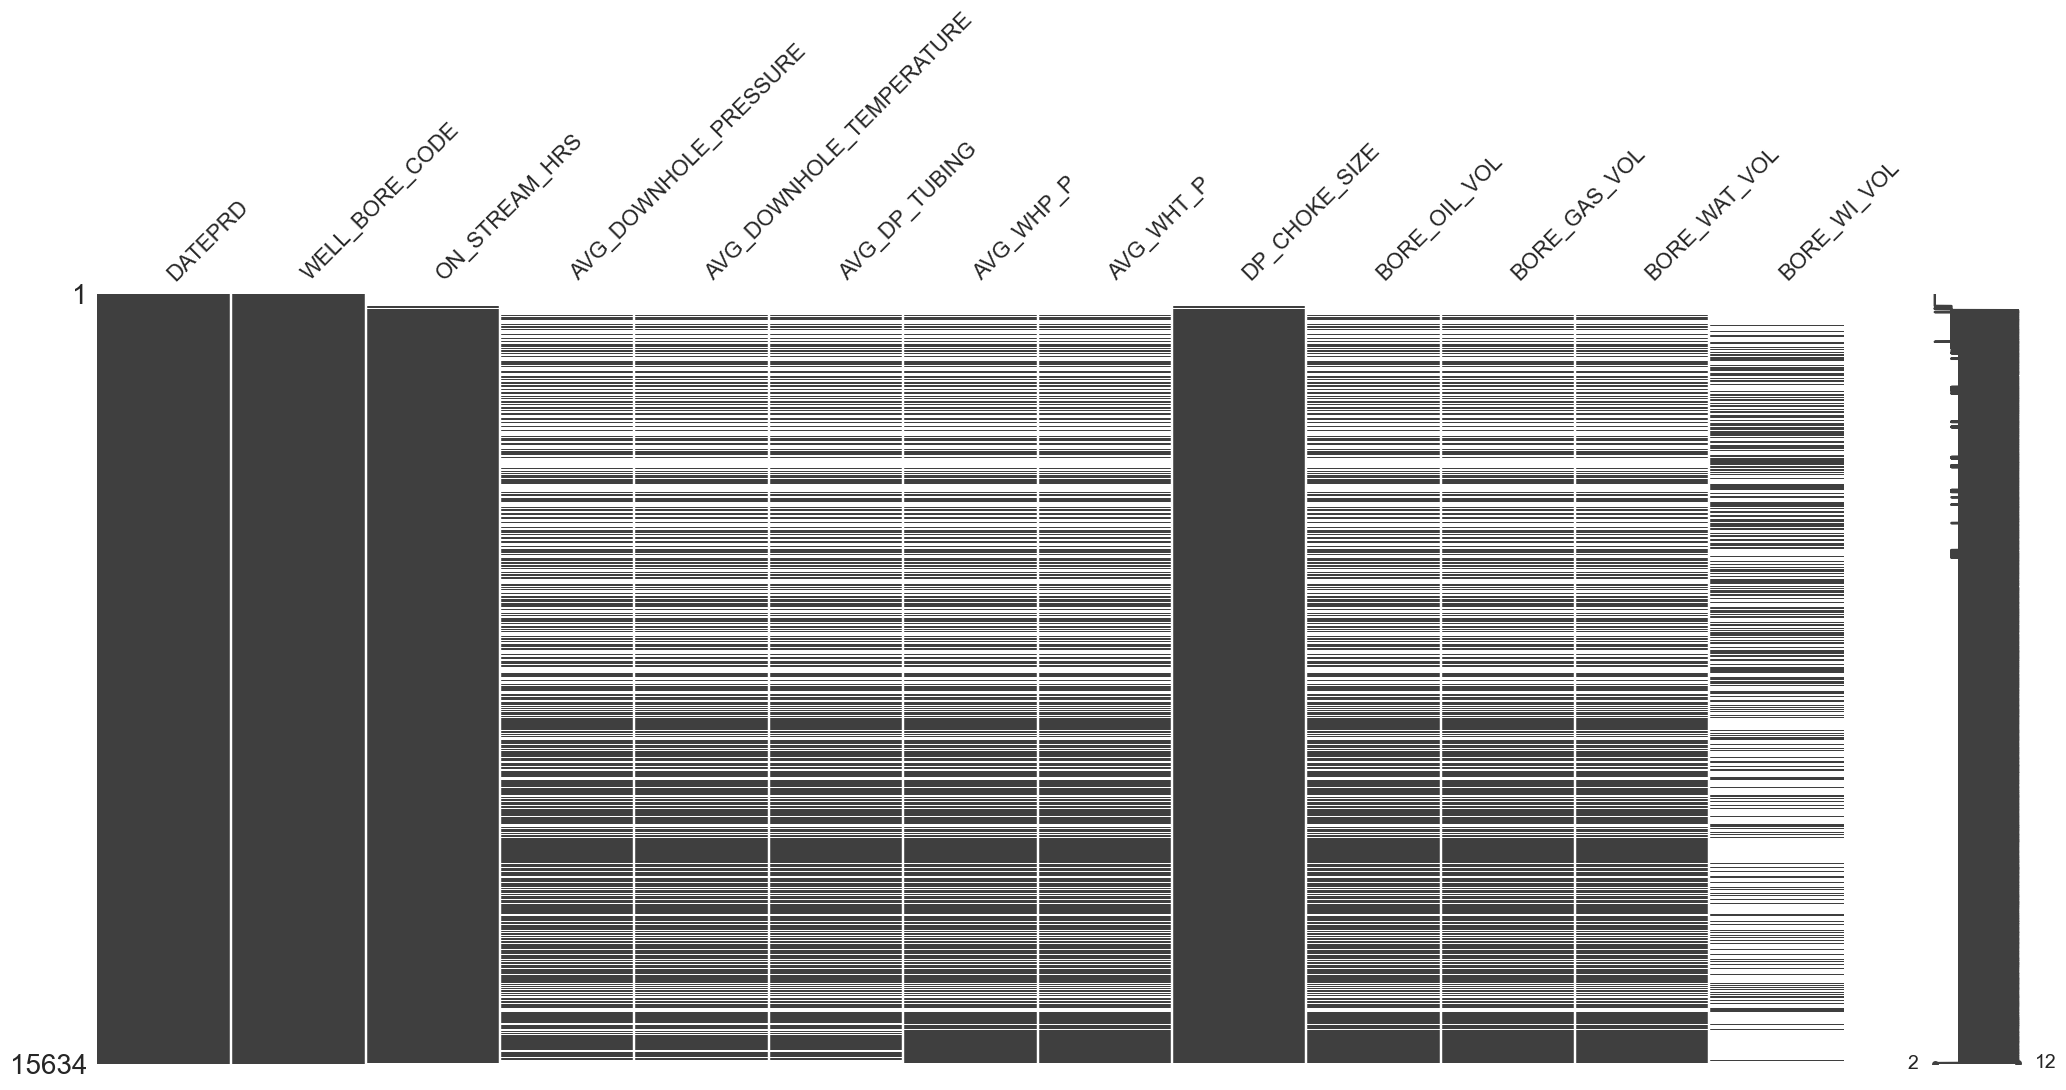

In [8]:
ms.matrix(df);

EDA

In [9]:
# we can choose to pick Well-C1 in case we want to benchmark them

# EDA
df_well_c1 = df[df["WELL_BORE_CODE"] == "Well-C1"]
df_well_c1

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
330   2008-02-12        Well-C1            0.0                    0.0   
334   2008-02-13        Well-C1            0.0                    0.0   
339   2008-02-14        Well-C1            0.0                    0.0   
341   2008-02-15        Well-C1            0.0                    0.0   
344   2008-02-16        Well-C1            0.0                    0.0   
...          ...            ...            ...                    ...   
15584 2016-09-13        Well-C1            0.0                    0.0   
15588 2016-09-14        Well-C1            0.0                    0.0   
15594 2016-09-15        Well-C1            0.0                    0.0   
15602 2016-09-16        Well-C1            0.0                    0.0   
15605 2016-09-17        Well-C1            0.0                    0.0   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_WHP_P  AVG_WHT_P  \
330                         0.0        0.00000    0.00000        0.0   
334                         0.0        0.00000    0.00000        0.0   
339                         0.0        0.00000    0.00000        0.0   
341                         0.0        0.00000    0.00000        0.0   
344                         0.0        0.00000    0.00000        0.0   
...                         ...            ...        ...        ...   
15584                       0.0       10.87335   10.87335        0.0   
15588                       0.0       10.87699   10.87699        0.0   
15594                       0.0       10.88277   10.88277        0.0   
15602                       0.0       10.87889   10.87889        0.0   
15605                       0.0       10.87613   10.87613        0.0   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
330          0.05885           0.0           0.0           0.0          NaN  
334          0.06768           0.0           0.0           0.0          NaN  
339          0.04950           0.0           0.0           0.0          NaN  
341          0.06640           0.0           0.0           0.0          NaN  
344          0.10479           0.0           0.0           0.0          NaN  
...              ...           ...           ...           ...          ...  
15584        8.89437           0.0           0.0           0.0          NaN  
15588        8.88767           0.0           0.0           0.0          NaN  
15594        8.85606           0.0           0.0           0.0          NaN  
15602        8.83878           0.0           0.0           0.0          NaN  
15605        8.82793           0.0           0.0           0.0          NaN  

[3056 rows x 13 columns]

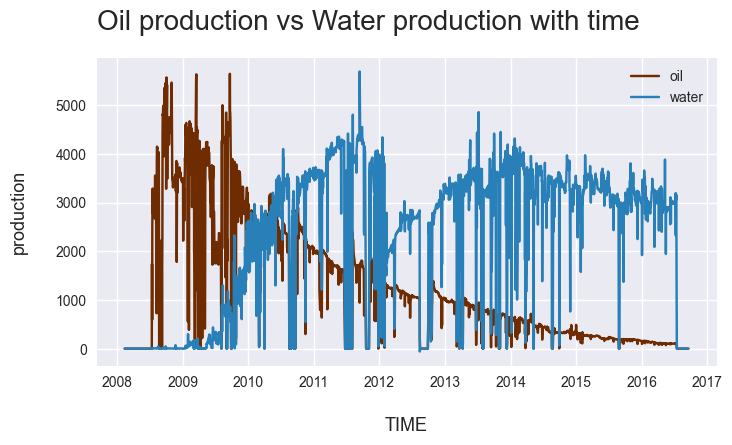

In [10]:
# EDA

# ['Well-N2', 'Well-W2', 'Well-C1', 'Well-W1', 'Well-N1', 'Well-S1', 'Well-E1']
df_well_c1 = df[df["WELL_BORE_CODE"] == "Well-C1"]

# main figure object
plt.figure(figsize= (8,4))
# make scatter plot between oil and gas production
plt.plot( df_well_c1["DATEPRD"], df_well_c1["BORE_OIL_VOL"],color="#6E2C00",label="oil") 
plt.plot(df_well_c1["DATEPRD"], df_well_c1["BORE_WAT_VOL"],color="#2980B9",label="water");

# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20)
plt.ylabel("production", fontsize= 13, labelpad = 20,loc="center")

# setting figure title 
plt.title("Oil production vs Water production with time ", fontsize= 20, pad = 20,loc="left")

plt.legend()
plt.show()

In [11]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056 entries, 330 to 15605
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   ON_STREAM_HRS             3056 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 5   AVG_DP_TUBING             3050 non-null   float64       
 6   AVG_WHP_P                 3056 non-null   float64       
 7   AVG_WHT_P                 3056 non-null   float64       
 8   DP_CHOKE_SIZE             3056 non-null   float64       
 9   BORE_OIL_VOL              3056 non-null   float64       
 10  BORE_GAS_VOL              3056 non-null   float64       
 11  BORE_WAT_VOL              3056 non-null   float64       
 12  BORE_WI_VOL      

In [12]:
df_well_c1.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 3056
dtype: int64

In [13]:
# we can try to use oil and water rate by using volumes/stream hrs
# also, on stream hrs cannot be 0 bcs it's going to make the calculations error
# we also want to delete column BORE_WI_VOL, since it is not correlated with our experiment
# we need to delete ON_STREAM_HRS, BORE_OIL_VOL, BORE_WAT_VOL, BORE_GAS_VOL to get rid of data leakage

df_well_c1 = df_well_c1.drop(columns="BORE_WI_VOL")

df_well_c1 = df_well_c1[df_well_c1["ON_STREAM_HRS"] > 0]

df_well_c1["oil_rate"] = df_well_c1["BORE_OIL_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1["water_rate"] = df_well_c1["BORE_WAT_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1 = df_well_c1.drop(columns = ["ON_STREAM_HRS", "BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL",])


In [14]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 936 to 15212
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2724 non-null   datetime64[ns]
 1   WELL_BORE_CODE            2724 non-null   object        
 2   AVG_DOWNHOLE_PRESSURE     2718 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2718 non-null   float64       
 4   AVG_DP_TUBING             2718 non-null   float64       
 5   AVG_WHP_P                 2724 non-null   float64       
 6   AVG_WHT_P                 2724 non-null   float64       
 7   DP_CHOKE_SIZE             2724 non-null   float64       
 8   oil_rate                  2724 non-null   float64       
 9   water_rate                2724 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 234.1+ KB


In [15]:
df_well_c1

DATEPRD WELL_BORE_CODE  AVG_DOWNHOLE_PRESSURE  \
936   2008-07-13        Well-C1             260.866875   
939   2008-07-14        Well-C1             256.248230   
943   2008-07-15        Well-C1             254.982785   
946   2008-07-16        Well-C1             251.475921   
951   2008-07-17        Well-C1             249.346191   
...          ...            ...                    ...   
15186 2016-07-09        Well-C1             268.812764   
15194 2016-07-10        Well-C1             265.922630   
15197 2016-07-11        Well-C1             267.768521   
15205 2016-07-12        Well-C1             266.002483   
15212 2016-07-13        Well-C1             266.388898   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
936                  103.292880     160.151955  100.714919  52.381899   
939                  104.017718     156.649912   99.598318  71.115352   
943                  103.967009     156.332844   98.649941  67.590753   
946                  104.210557     155.817187   95.658734  73.782251   
951                  104.339184     155.760939   93.585252  78.035440   
...                         ...            ...         ...        ...   
15186                100.295456     239.081167   29.731597  87.864056   
15194                100.338436     238.398367   27.524263  89.153704   
15197                100.320956     238.638669   29.129852  89.074774   
15205                100.345865     238.273904   27.728579  89.503524   
15212                100.358734     238.257230   28.131667  89.354794   

       DP_CHOKE_SIZE    oil_rate  water_rate  
936        69.539413   72.302500    0.166667  
939        68.016167  106.348294    0.245961  
943        66.948884  105.508750    0.243333  
946        63.663812  126.279583    0.380417  
951        61.337700  137.003333    0.315833  
...              ...         ...         ...  
15186       4.114340    4.503972  102.628265  
15194       1.959482    4.724167  132.727917  
15197       3.407768    4.598873  129.138996  
15205       1.938210    4.743333  131.204583  
15212       2.536683    4.597873  128.089059  

[2724 rows x 10 columns]

In [16]:
# we want to see the distribution of the data using graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Rate Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

In [17]:
figure = make_subplots(
            rows=8, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="wat_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["wat_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="water_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=2, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_PRESSURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_PRESSURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=3, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_TEMPERATURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_TEMPERATURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=4, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DP_TUBING",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DP_TUBING"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=5, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHP_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHP_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=6, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHT_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHT_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=7, col=1
    )

figure.add_trace(
    go.Scatter(
        name="DP_CHOKE_SIZE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["DP_CHOKE_SIZE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=8, col=1
    )

figure.update_layout(
            height=2000,
            autosize=True,  # Allow the figure to be autosized
            margin=dict(l=10, r=10, t=10, b=10),  # Adjust the margins for the figure
            legend=dict(
                x=0.75,   # Set the x position of the legend (0.5 means centered horizontally)
                y=1.0,   # Set the y position of the legend (1.0 means at the top)
                xanchor='center',  # Anchor point for the x position ('center' for center alignment)
                yanchor='top',     # Anchor point for the y position ('top' for top alignment)
                orientation='v',   # Orientation of the legend ('h' for horizontal)
                bgcolor='rgba(255, 255, 255, 0.5)',  # Background color of the legend (with transparency)
                # bordercolor='rgba(0, 0, 0, 0.5)',     # Border color of the legend (with transparency)
                # borderwidth=1       # Border width of the legend
            )
        )

figure.show()

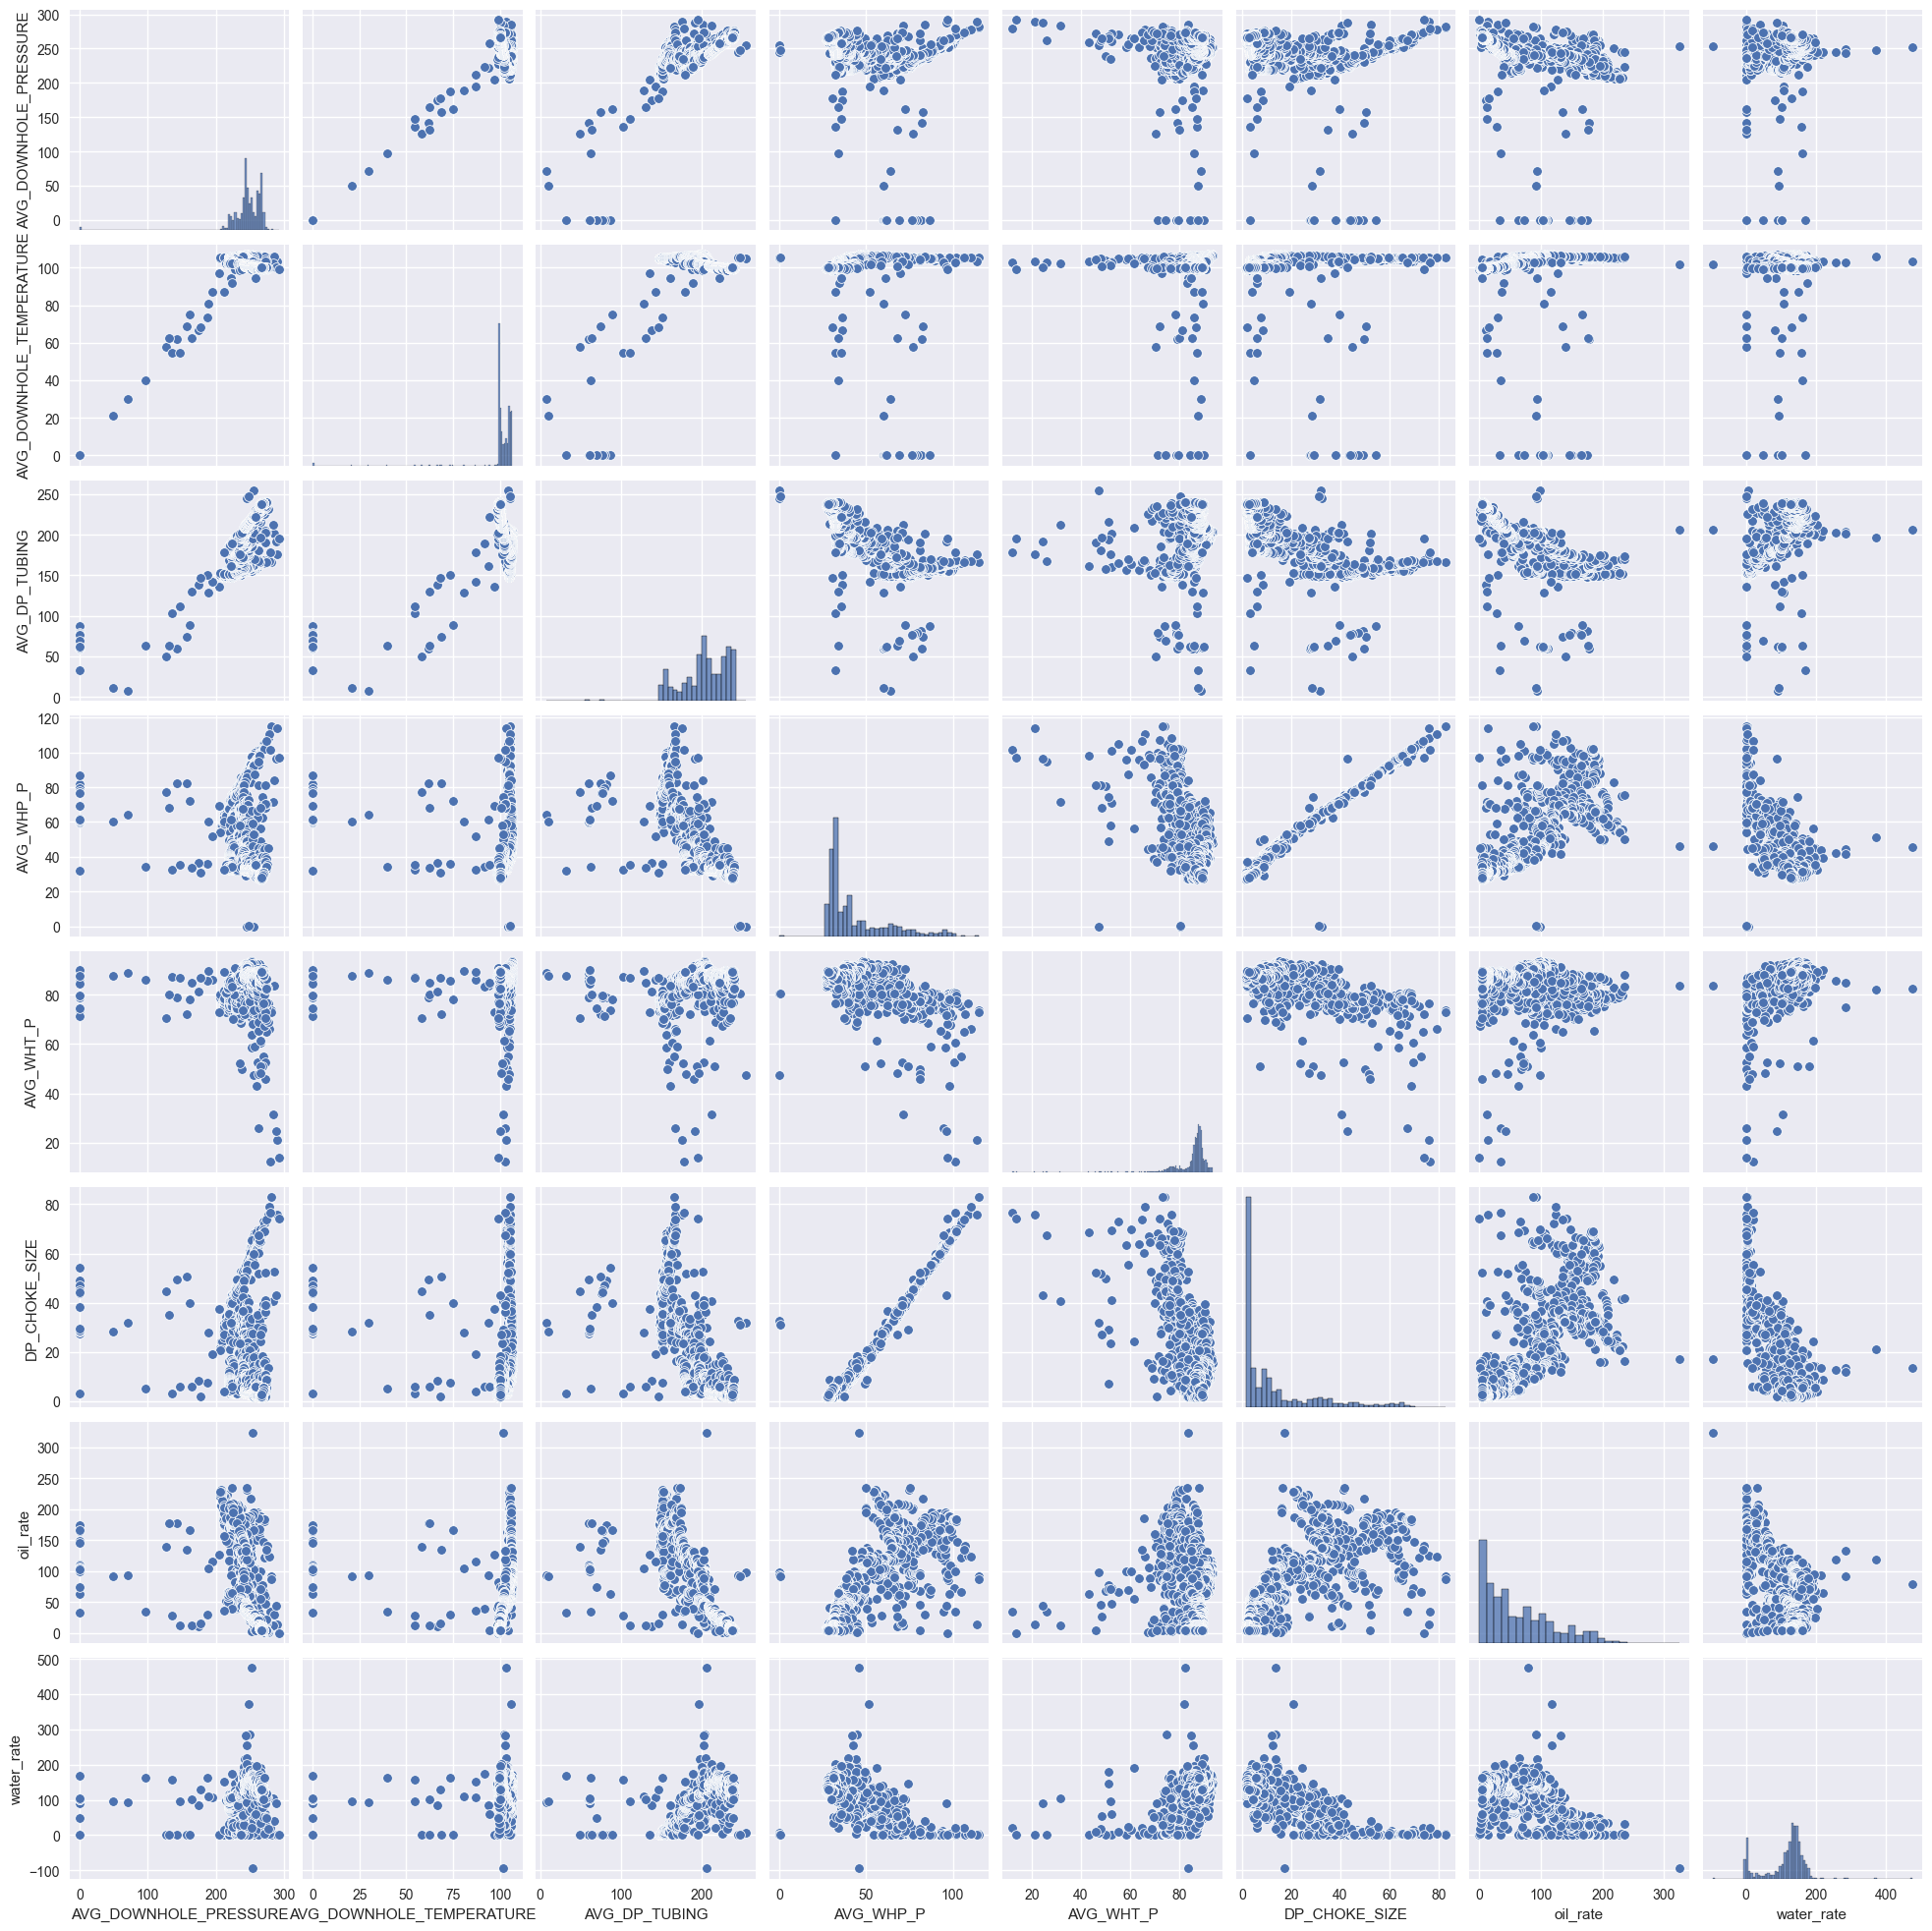

In [18]:
# have a look at all the scatter plots between all variables
sns.pairplot(df_well_c1);

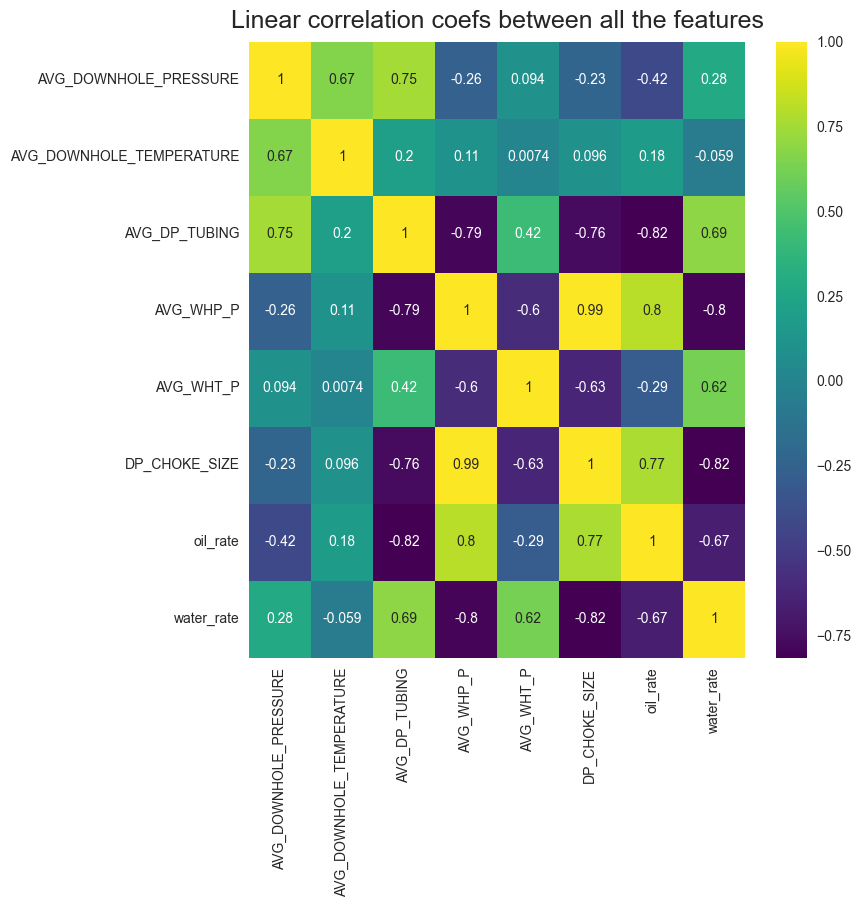

In [19]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1.corr(), annot=True, cmap="viridis");

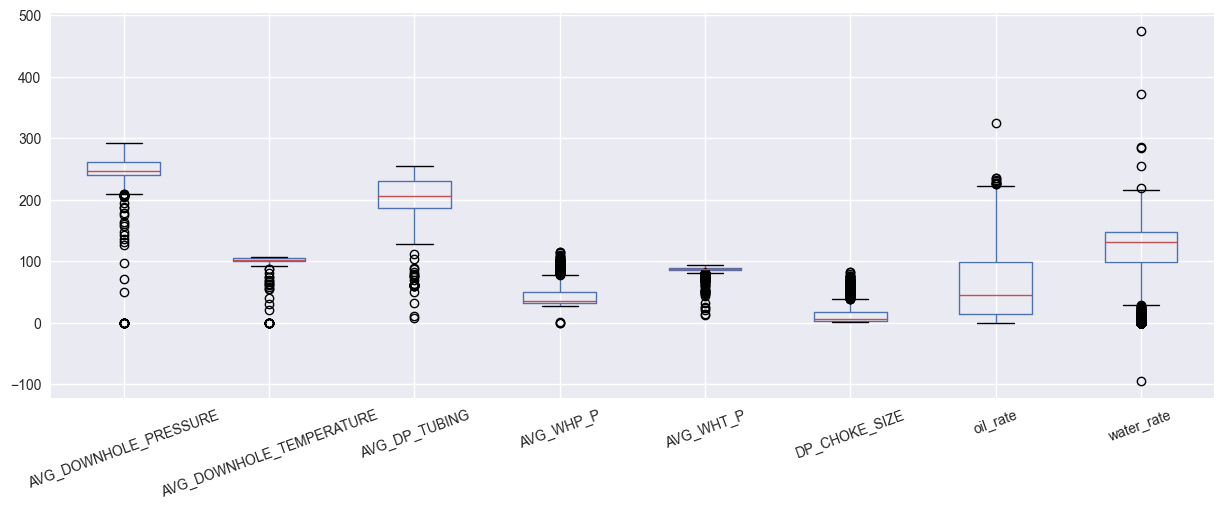

In [20]:
# show the data distribution to see if there is outliers
plt.figure(figsize=(15,5))
df_well_c1.boxplot()
plt.xticks(rotation=20)
plt.show();

normalization

In [21]:
df_well_c1 = df_well_c1.set_index('DATEPRD')
df_well_c1

WELL_BORE_CODE  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
DATEPRD                                                                      
2008-07-13        Well-C1             260.866875                103.292880   
2008-07-14        Well-C1             256.248230                104.017718   
2008-07-15        Well-C1             254.982785                103.967009   
2008-07-16        Well-C1             251.475921                104.210557   
2008-07-17        Well-C1             249.346191                104.339184   
...                   ...                    ...                       ...   
2016-07-09        Well-C1             268.812764                100.295456   
2016-07-10        Well-C1             265.922630                100.338436   
2016-07-11        Well-C1             267.768521                100.320956   
2016-07-12        Well-C1             266.002483                100.345865   
2016-07-13        Well-C1             266.388898                100.358734   

            AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE    oil_rate  \
DATEPRD                                                                       
2008-07-13     160.151955  100.714919  52.381899      69.539413   72.302500   
2008-07-14     156.649912   99.598318  71.115352      68.016167  106.348294   
2008-07-15     156.332844   98.649941  67.590753      66.948884  105.508750   
2008-07-16     155.817187   95.658734  73.782251      63.663812  126.279583   
2008-07-17     155.760939   93.585252  78.035440      61.337700  137.003333   
...                   ...         ...        ...            ...         ...   
2016-07-09     239.081167   29.731597  87.864056       4.114340    4.503972   
2016-07-10     238.398367   27.524263  89.153704       1.959482    4.724167   
2016-07-11     238.638669   29.129852  89.074774       3.407768    4.598873   
2016-07-12     238.273904   27.728579  89.503524       1.938210    4.743333   
2016-07-13     238.257230   28.131667  89.354794       2.536683    4.597873   

            water_rate  
DATEPRD                 
2008-07-13    0.166667  
2008-07-14    0.245961  
2008-07-15    0.243333  
2008-07-16    0.380417  
2008-07-17    0.315833  
...                ...  
2016-07-09  102.628265  
2016-07-10  132.727917  
2016-07-11  129.138996  
2016-07-12  131.204583  
2016-07-13  128.089059  

[2724 rows x 9 columns]

In [22]:
# the data mostly seems skewed, but we can make it good with normalization
# we separate date and features first
# checkpoint

df_well_c1_well_date = pd.DataFrame(df_well_c1, columns=['WELL_BORE_CODE'])

df_well_c1_features = df_well_c1.drop(columns=["WELL_BORE_CODE"])
df_well_c1_well_date

WELL_BORE_CODE
DATEPRD                  
2008-07-13        Well-C1
2008-07-14        Well-C1
2008-07-15        Well-C1
2008-07-16        Well-C1
2008-07-17        Well-C1
...                   ...
2016-07-09        Well-C1
2016-07-10        Well-C1
2016-07-11        Well-C1
2016-07-12        Well-C1
2016-07-13        Well-C1

[2724 rows x 1 columns]

In [23]:
# try to use logaritmic transform
# but first, we remove the zeros value

df_well_c1_features = df_well_c1_features[df_well_c1_features != 0]

# df_well_c1_features = pd.DataFrame(df_well_c1_features, columns=['DATEPRD', 'WELL_BORE_CODE'])

df_well_c1_features = np.log10(df_well_c1_features)
df_well_c1_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2724 entries, 2008-07-13 to 2016-07-13
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AVG_DOWNHOLE_PRESSURE     2703 non-null   float64
 1   AVG_DOWNHOLE_TEMPERATURE  2703 non-null   float64
 2   AVG_DP_TUBING             2718 non-null   float64
 3   AVG_WHP_P                 2723 non-null   float64
 4   AVG_WHT_P                 2724 non-null   float64
 5   DP_CHOKE_SIZE             2724 non-null   float64
 6   oil_rate                  2723 non-null   float64
 7   water_rate                2718 non-null   float64
dtypes: float64(8)
memory usage: 191.5 KB


In [24]:
# df_well_c1_features
ind = df_well_c1_features.reset_index()
index = pd.DataFrame(ind["DATEPRD"])
index

DATEPRD
0    2008-07-13
1    2008-07-14
2    2008-07-15
3    2008-07-16
4    2008-07-17
...         ...
2719 2016-07-09
2720 2016-07-10
2721 2016-07-11
2722 2016-07-12
2723 2016-07-13

[2724 rows x 1 columns]

In [25]:
# use normalization of power transformer from yeo-johnson

import numpy as np
from sklearn.preprocessing import PowerTransformer

# Create an instance of PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

# Apply power transformation to your dataset
df_well_c1_t = transformer.fit_transform(df_well_c1_features)

df_well_c1_t = pd.DataFrame(df_well_c1_t)
# df_well_c1_t.info()


# rename array columns
df_well_c1_t = df_well_c1_t.rename(
    columns={
        0:"AVG_DOWNHOLE_PRESSURE",
        1:"AVG_DOWNHOLE_TEMPERATURE" ,
        2:"AVG_DP_TUBING" ,
        3:"AVG_WHP_P" ,
        4:"AVG_WHT_P" ,
        5:"DP_CHOKE_SIZE" ,
        6:"oil_rate" ,
        7:"water_rate" ,
        }   
    )

df_well_c1_t.info()
df_well_c1_t

# 0   AVG_DOWNHOLE_PRESSURE     2703 non-null   float64
# 1   AVG_DOWNHOLE_TEMPERATURE  2703 non-null   float64
# 2   AVG_DP_TUBING             2718 non-null   float64
# 3   AVG_WHP_P                 2721 non-null   float64
# 4   AVG_WHT_P                 2724 non-null   float64
# 5   DP_CHOKE_SIZE             2724 non-null   float64
# 6   oil_rate                  2722 non-null   float64
# 7   water_rate                2503 non-null   float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AVG_DOWNHOLE_PRESSURE     2703 non-null   float64
 1   AVG_DOWNHOLE_TEMPERATURE  2703 non-null   float64
 2   AVG_DP_TUBING             2718 non-null   float64
 3   AVG_WHP_P                 2723 non-null   float64
 4   AVG_WHT_P                 2724 non-null   float64
 5   DP_CHOKE_SIZE             2724 non-null   float64
 6   oil_rate                  2723 non-null   float64
 7   water_rate                2718 non-null   float64
dtypes: float64(8)
memory usage: 170.4 KB


AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
0                  0.814108                  0.229315      -1.470338   
1                  0.455324                  0.509061      -1.549722   
2                  0.361219                  0.488981      -1.556727   
3                  0.109566                  0.586131      -1.568056   
4                 -0.036868                  0.638171      -1.569287   
...                     ...                       ...            ...   
2719               1.490343                 -0.774244       1.445528   
2720               1.235464                 -0.761461       1.409938   
2721               1.397049                 -0.766665       1.422441   
2722               1.242367                 -0.759247       1.403472   
2723               1.275882                 -0.755409       1.402606   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  oil_rate  water_rate  
0      2.590019  -2.437283       1.653697  0.526303   -2.350490  
1      2.554937  -2.147893       1.642905  0.934669   -2.348112  
2      2.524883  -2.273471       1.635167  0.926048   -2.348189  
3      2.428485  -2.004790       1.610378  1.123909   -2.344211  
4      2.360179  -1.648966       1.591867  1.215305   -2.346079  
...         ...        ...            ...       ...         ...  
2719  -0.866629   0.288888      -0.355270 -1.728978    0.014667  
2720  -1.059489   0.730959      -1.272742 -1.700335    0.422202  
2721  -0.918042   0.702186      -0.562747 -1.716509    0.376353  
2722  -1.041130   0.861314      -1.288555 -1.697889    0.402823  
2723  -1.005224   0.805323      -0.920605 -1.716640    0.362813  

[2724 rows x 8 columns]

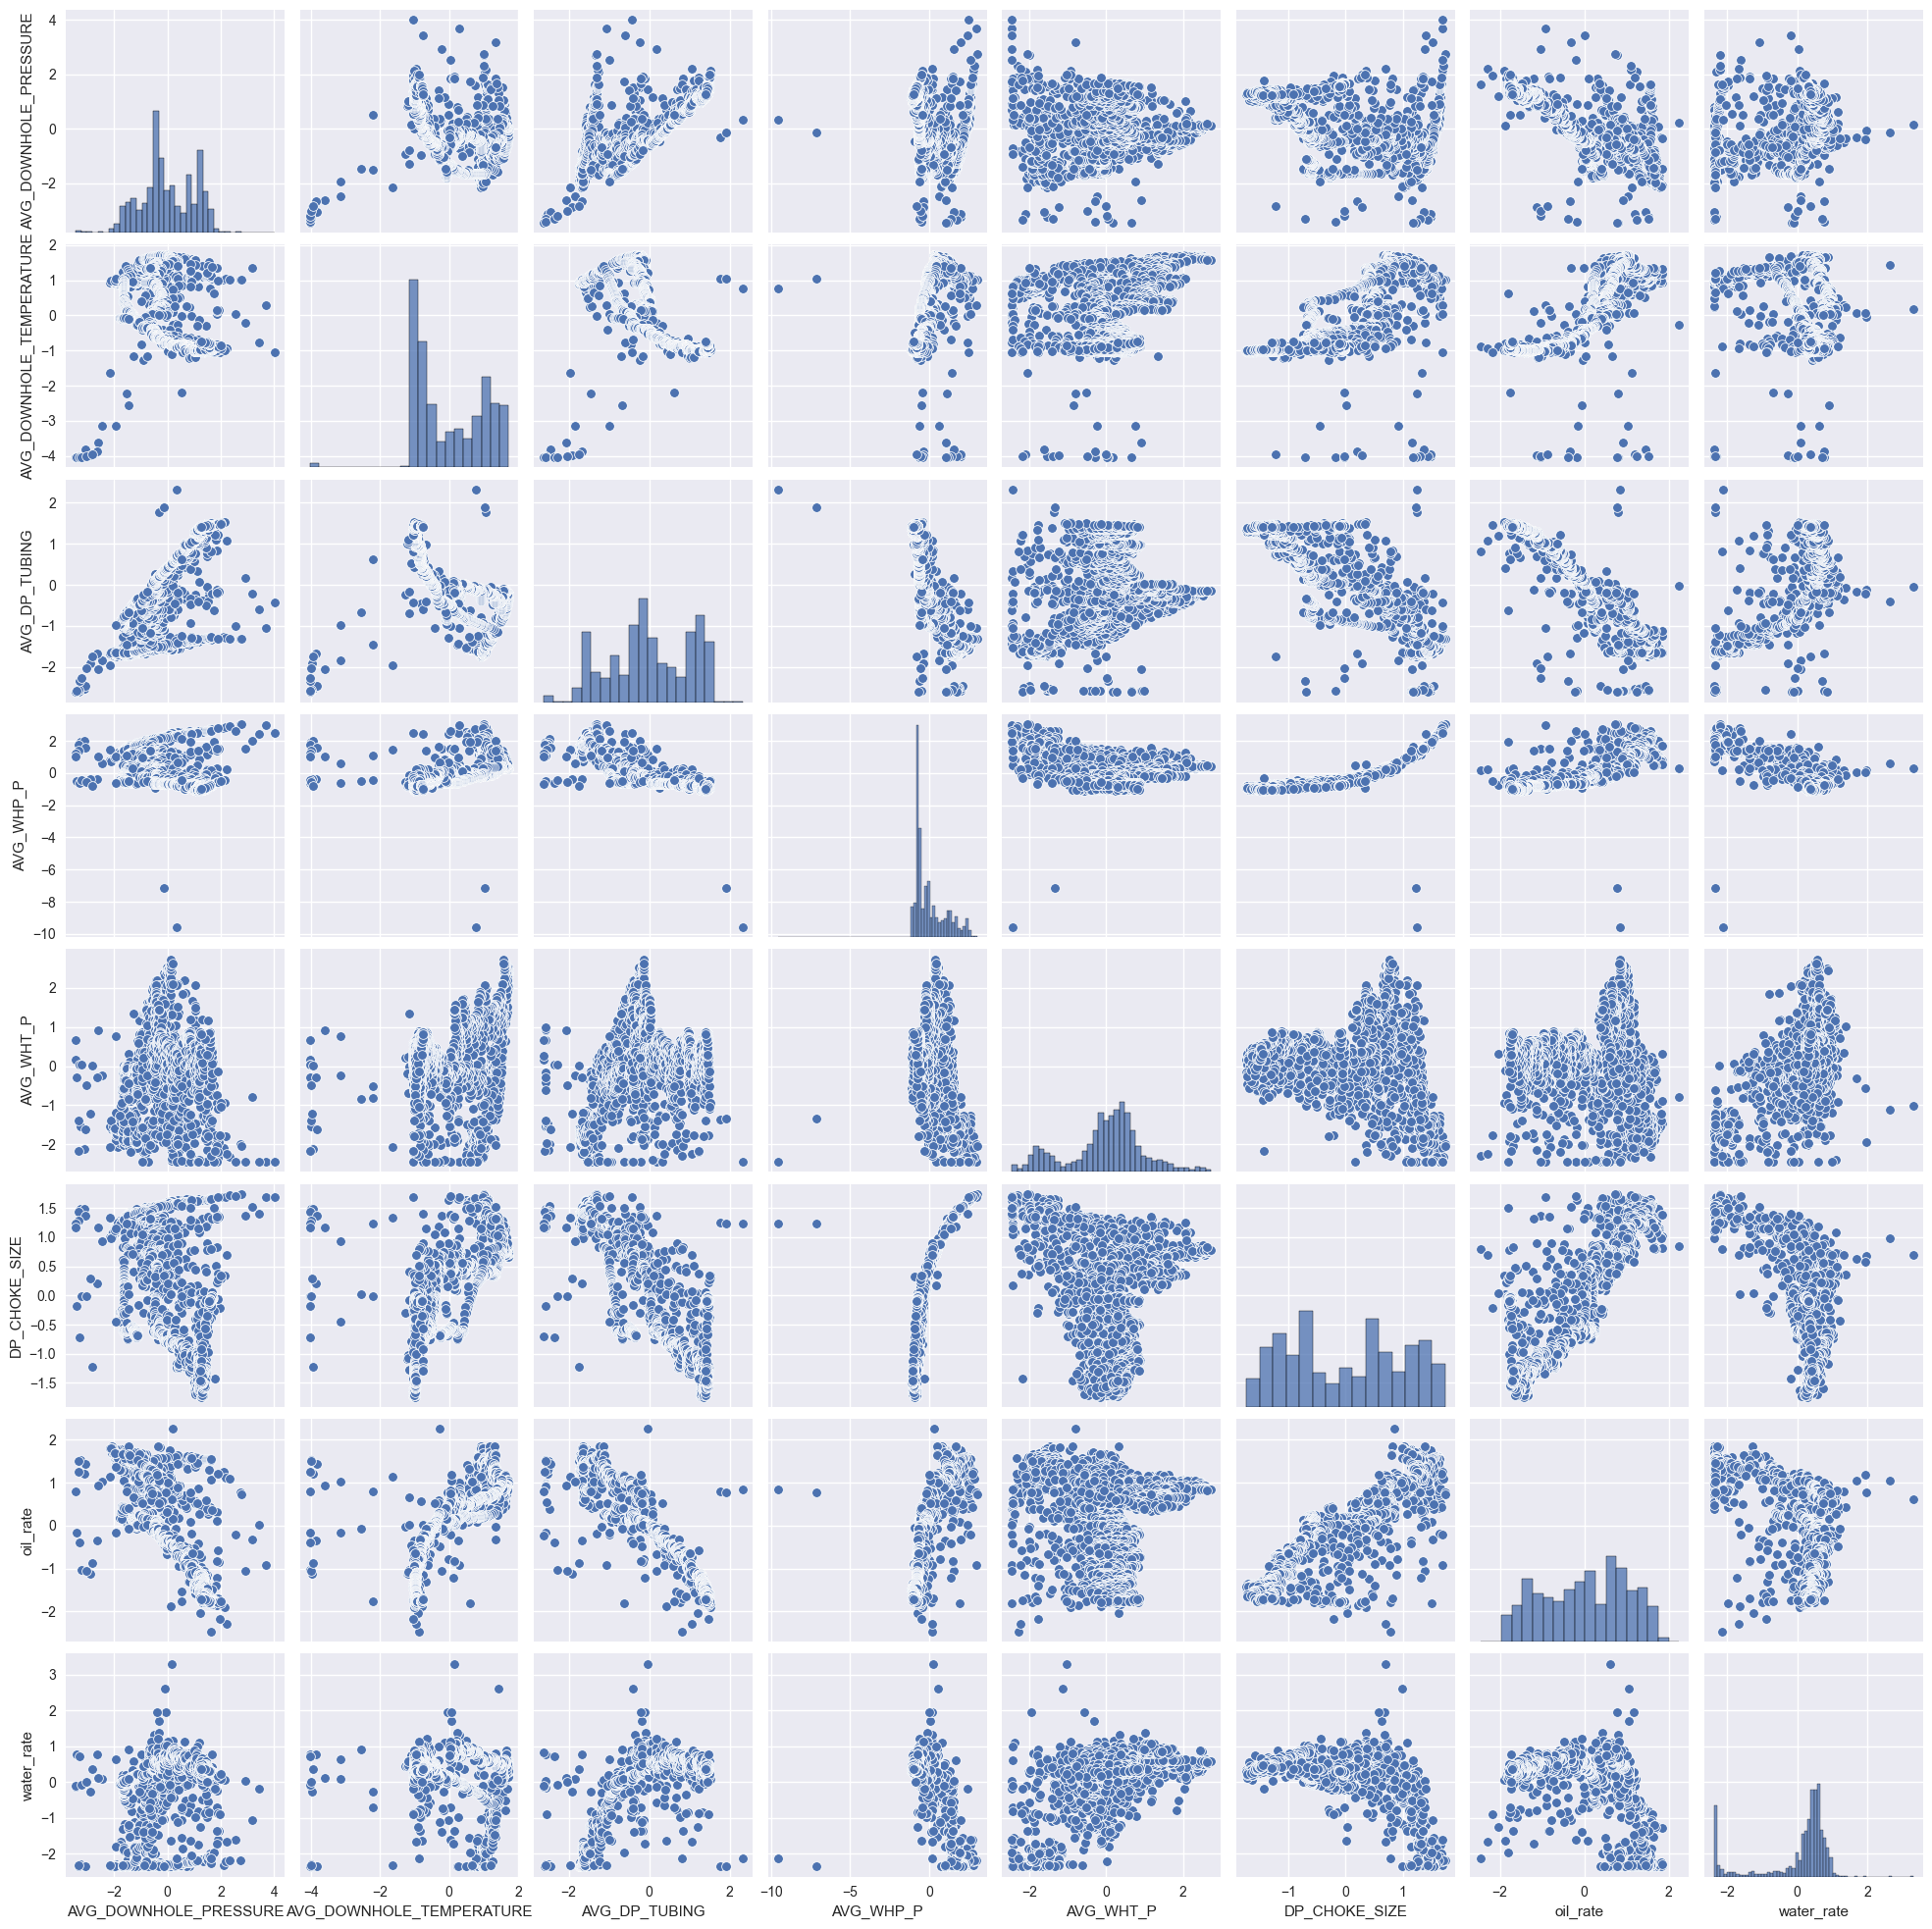

In [26]:
# see the distribution again
# have a look at all the scatter plots between all variables
sns.pairplot(df_well_c1_t);

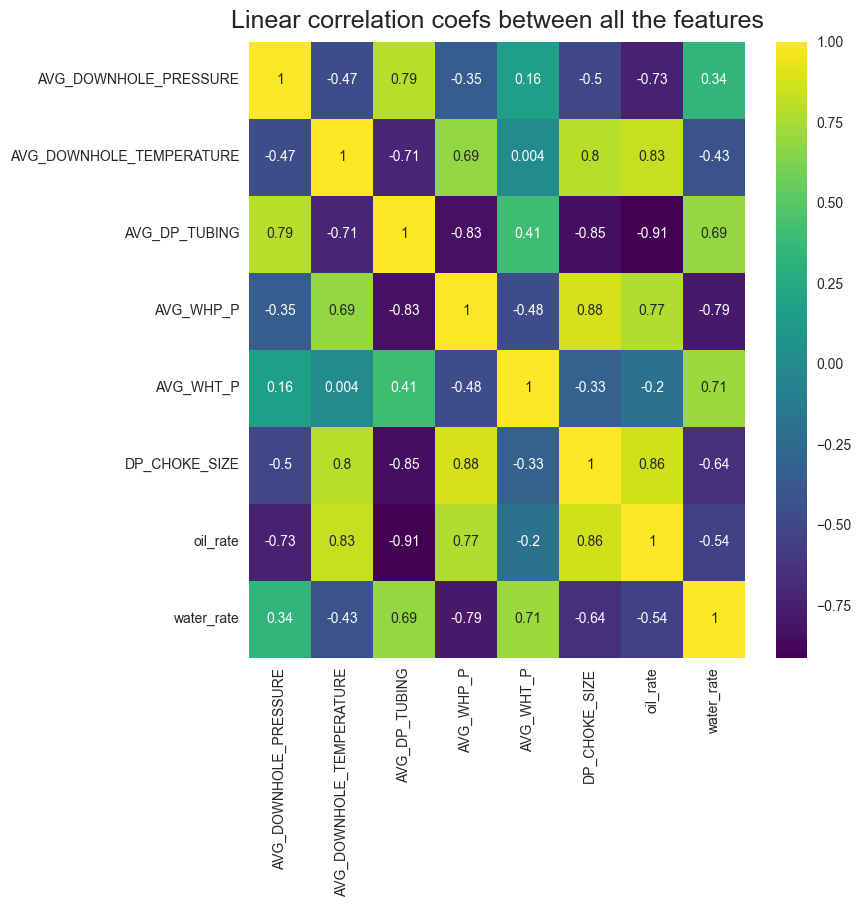

In [27]:
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1_t.corr(), annot=True, cmap="viridis");

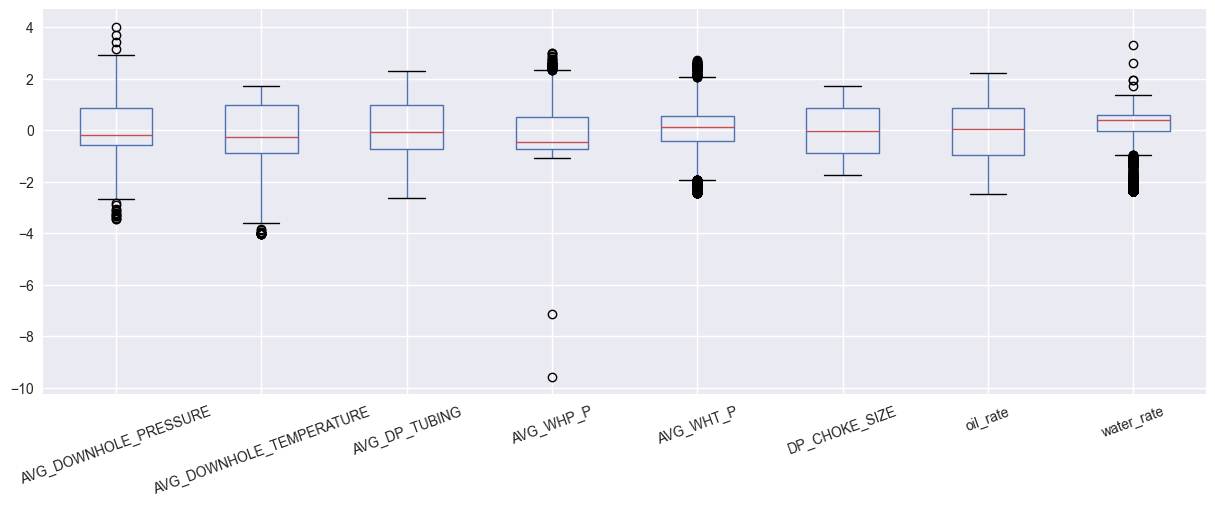

In [28]:
# show the data distribution to see if there is outliers
plt.figure(figsize=(15,5))
df_well_c1_t.boxplot()
plt.xticks(rotation=20)
plt.show();

removing outliers

In [29]:
df_well_c1_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AVG_DOWNHOLE_PRESSURE     2703 non-null   float64
 1   AVG_DOWNHOLE_TEMPERATURE  2703 non-null   float64
 2   AVG_DP_TUBING             2718 non-null   float64
 3   AVG_WHP_P                 2723 non-null   float64
 4   AVG_WHT_P                 2724 non-null   float64
 5   DP_CHOKE_SIZE             2724 non-null   float64
 6   oil_rate                  2723 non-null   float64
 7   water_rate                2718 non-null   float64
dtypes: float64(8)
memory usage: 170.4 KB


In [30]:
# drop some nulls data
df_well_c1_t = df_well_c1_t.dropna()

In [31]:
df_well_c1_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2696 entries, 0 to 2723
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AVG_DOWNHOLE_PRESSURE     2696 non-null   float64
 1   AVG_DOWNHOLE_TEMPERATURE  2696 non-null   float64
 2   AVG_DP_TUBING             2696 non-null   float64
 3   AVG_WHP_P                 2696 non-null   float64
 4   AVG_WHT_P                 2696 non-null   float64
 5   DP_CHOKE_SIZE             2696 non-null   float64
 6   oil_rate                  2696 non-null   float64
 7   water_rate                2696 non-null   float64
dtypes: float64(8)
memory usage: 189.6 KB


In [32]:
df_well_c1_t

AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
0                  0.814108                  0.229315      -1.470338   
1                  0.455324                  0.509061      -1.549722   
2                  0.361219                  0.488981      -1.556727   
3                  0.109566                  0.586131      -1.568056   
4                 -0.036868                  0.638171      -1.569287   
...                     ...                       ...            ...   
2719               1.490343                 -0.774244       1.445528   
2720               1.235464                 -0.761461       1.409938   
2721               1.397049                 -0.766665       1.422441   
2722               1.242367                 -0.759247       1.403472   
2723               1.275882                 -0.755409       1.402606   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  oil_rate  water_rate  
0      2.590019  -2.437283       1.653697  0.526303   -2.350490  
1      2.554937  -2.147893       1.642905  0.934669   -2.348112  
2      2.524883  -2.273471       1.635167  0.926048   -2.348189  
3      2.428485  -2.004790       1.610378  1.123909   -2.344211  
4      2.360179  -1.648966       1.591867  1.215305   -2.346079  
...         ...        ...            ...       ...         ...  
2719  -0.866629   0.288888      -0.355270 -1.728978    0.014667  
2720  -1.059489   0.730959      -1.272742 -1.700335    0.422202  
2721  -0.918042   0.702186      -0.562747 -1.716509    0.376353  
2722  -1.041130   0.861314      -1.288555 -1.697889    0.402823  
2723  -1.005224   0.805323      -0.920605 -1.716640    0.362813  

[2696 rows x 8 columns]

In [33]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Generate some sample data
X = df_well_c1_t

# Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
outliers_if = clf.fit_predict(X)
outliers_removed_if = X[outliers_if != -1]
num_outliers_if = 2696 - np.sum(outliers_if == -1)

# Minimum Covariance using Elliptic Envelope
clf = EllipticEnvelope(contamination=0.1)
outliers_ee = clf.fit_predict(X)
outliers_removed_ee = X[outliers_ee != -1]
num_outliers_ee = 2696 - np.sum(outliers_ee == -1)

# Local Outlier Factor
clf = LocalOutlierFactor(contamination=0.1)
outliers_lof = clf.fit_predict(X)
outliers_removed_lof = X[outliers_lof != -1]
num_outliers_lof = 2696 - np.sum(outliers_lof == -1)

# One-class Support Vector Machine
clf = OneClassSVM(nu=0.1)
outliers_svm = clf.fit_predict(X)
outliers_removed_svm = X[outliers_svm != -1]
num_outliers_svm = 2696 - np.sum(outliers_svm == -1)

# Standard deviation method
threshold = 2  # Define the threshold in terms of standard deviations
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
outliers_std = np.abs((X - mean) / std) > threshold
outliers_removed_std = X[~np.any(outliers_std, axis=1)]
num_outliers_std = 2696 - np.sum(np.any(outliers_std, axis=1))

# Print the number of outliers removed by each method
print("Number of data remaining by Isolation Forest:", num_outliers_if)
print("Number of data remaining by Elliptic Envelope:", num_outliers_ee)
print("Number of data remaining by Local Outlier Factor:", num_outliers_lof)
print("Number of data remaining by One-class SVM:", num_outliers_svm)
print("Number of data remaining by Standard Deviation method:", num_outliers_std)


Number of data remaining by Isolation Forest: 2426
Number of data remaining by Elliptic Envelope: 2426
Number of data remaining by Local Outlier Factor: 2426
Number of data remaining by One-class SVM: 2426
Number of data remaining by Standard Deviation method: 2261


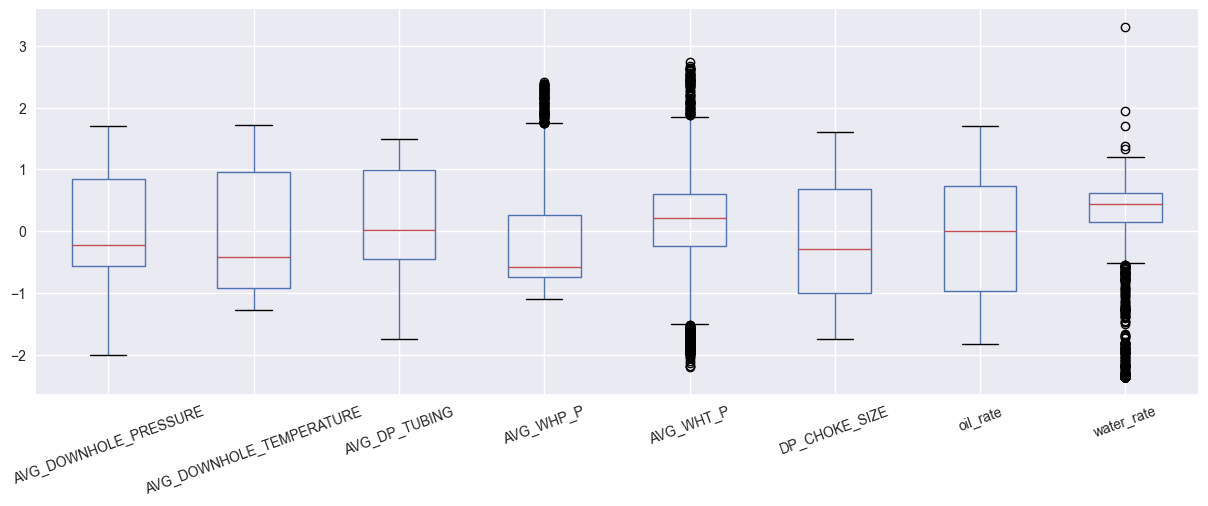

In [34]:
# outliers_removed_if
# outliers_removed_ee
# outliers_removed_lof
# outliers_removed_svm
# outliers_removed_std

plt.figure(figsize=(15,5))
outliers_removed_if.boxplot()
plt.xticks(rotation=20)
plt.show()

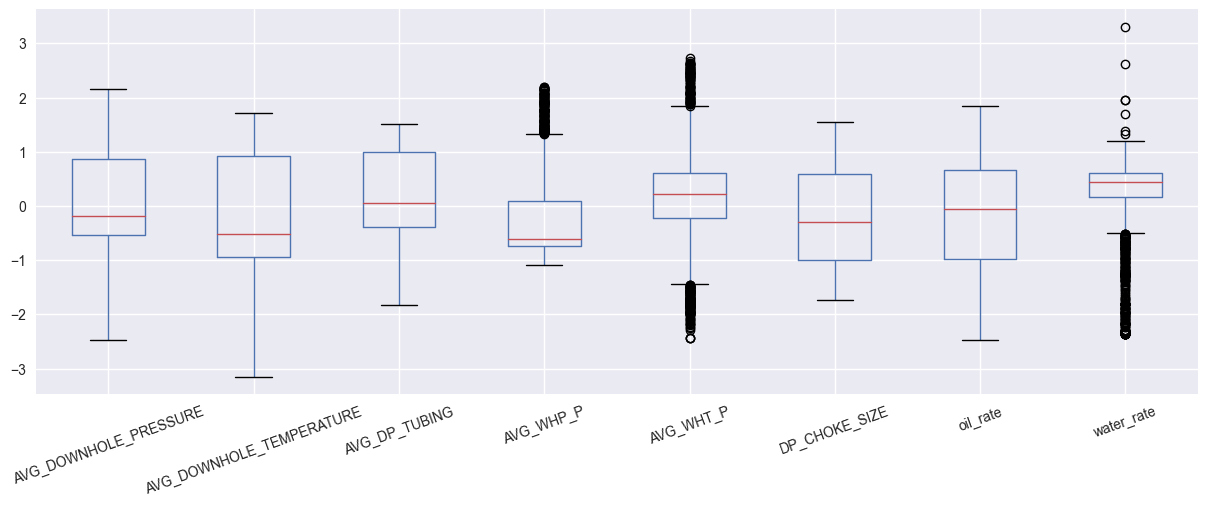

In [35]:
# outliers_removed_if
# outliers_removed_ee
# outliers_removed_lof
# outliers_removed_svm
# outliers_removed_std

plt.figure(figsize=(15,5))
outliers_removed_ee.boxplot()
plt.xticks(rotation=20)
plt.show()

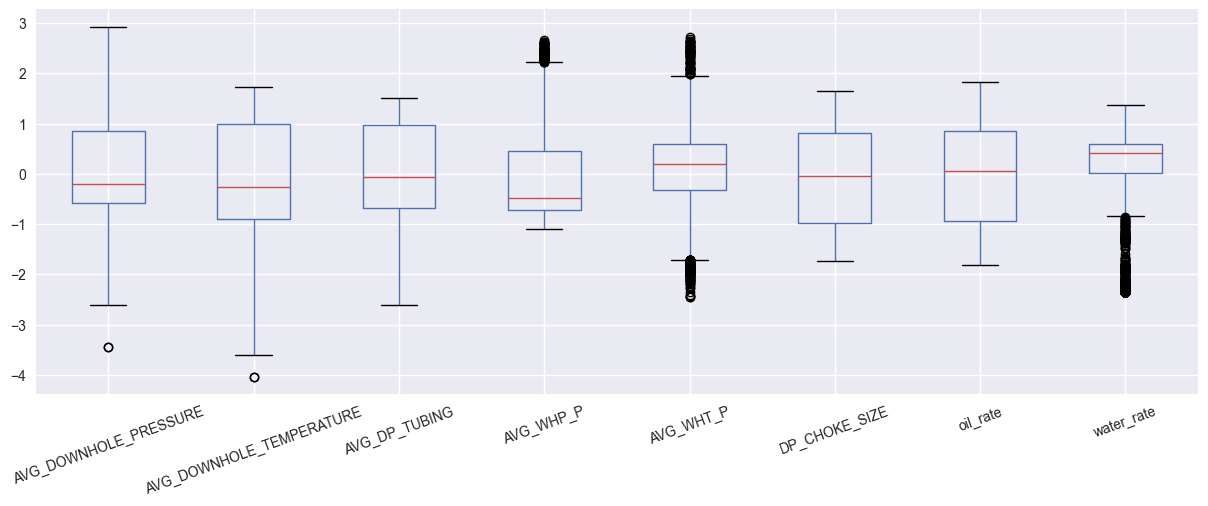

In [36]:
# outliers_removed_if
# outliers_removed_ee
# outliers_removed_lof
# outliers_removed_svm
# outliers_removed_std

# BEST MAYBE???!?!? Local Outlier Factor

plt.figure(figsize=(15,5))
outliers_removed_lof.boxplot()
plt.xticks(rotation=20)
plt.show()

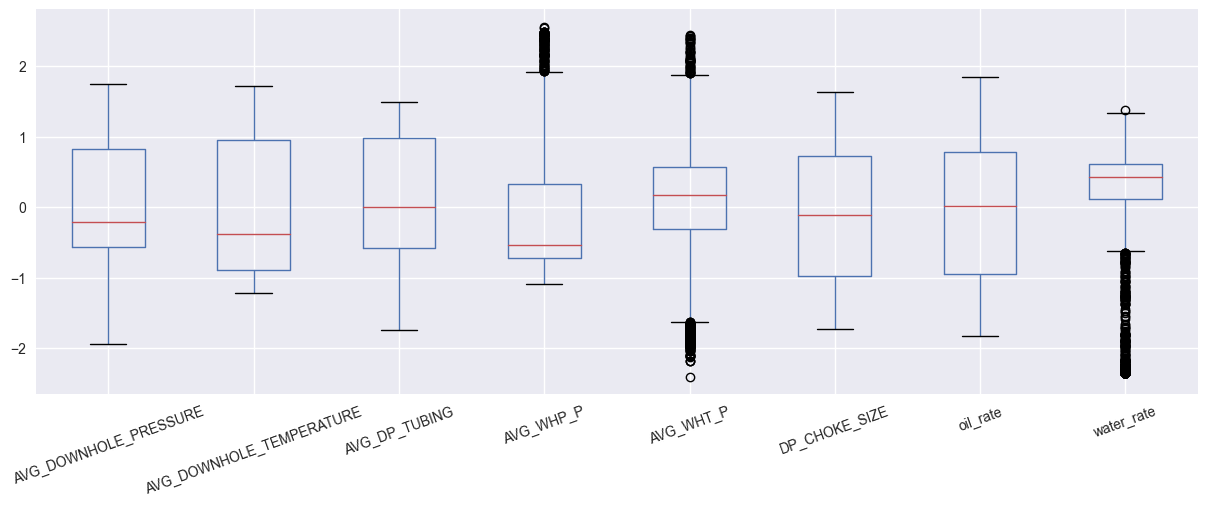

In [37]:
# outliers_removed_if
# outliers_removed_ee
# outliers_removed_lof
# outliers_removed_svm
# outliers_removed_std

plt.figure(figsize=(15,5))
outliers_removed_svm.boxplot()
plt.xticks(rotation=20)
plt.show()

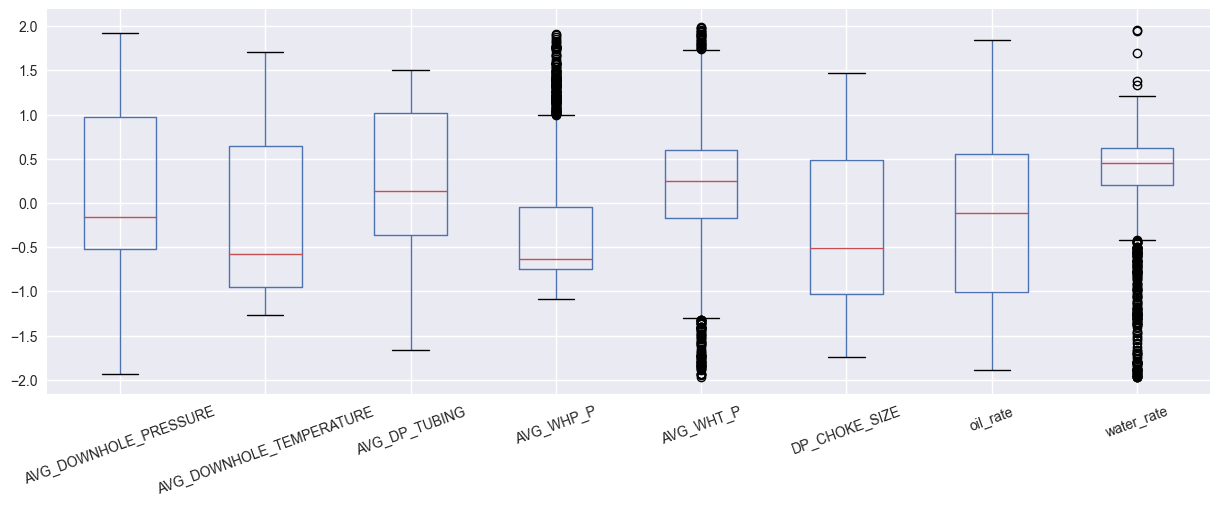

In [38]:
# outliers_removed_if
# outliers_removed_ee
# outliers_removed_lof
# outliers_removed_svm
# outliers_removed_std

plt.figure(figsize=(15,5))
outliers_removed_std.boxplot()
plt.xticks(rotation=20)
plt.show()

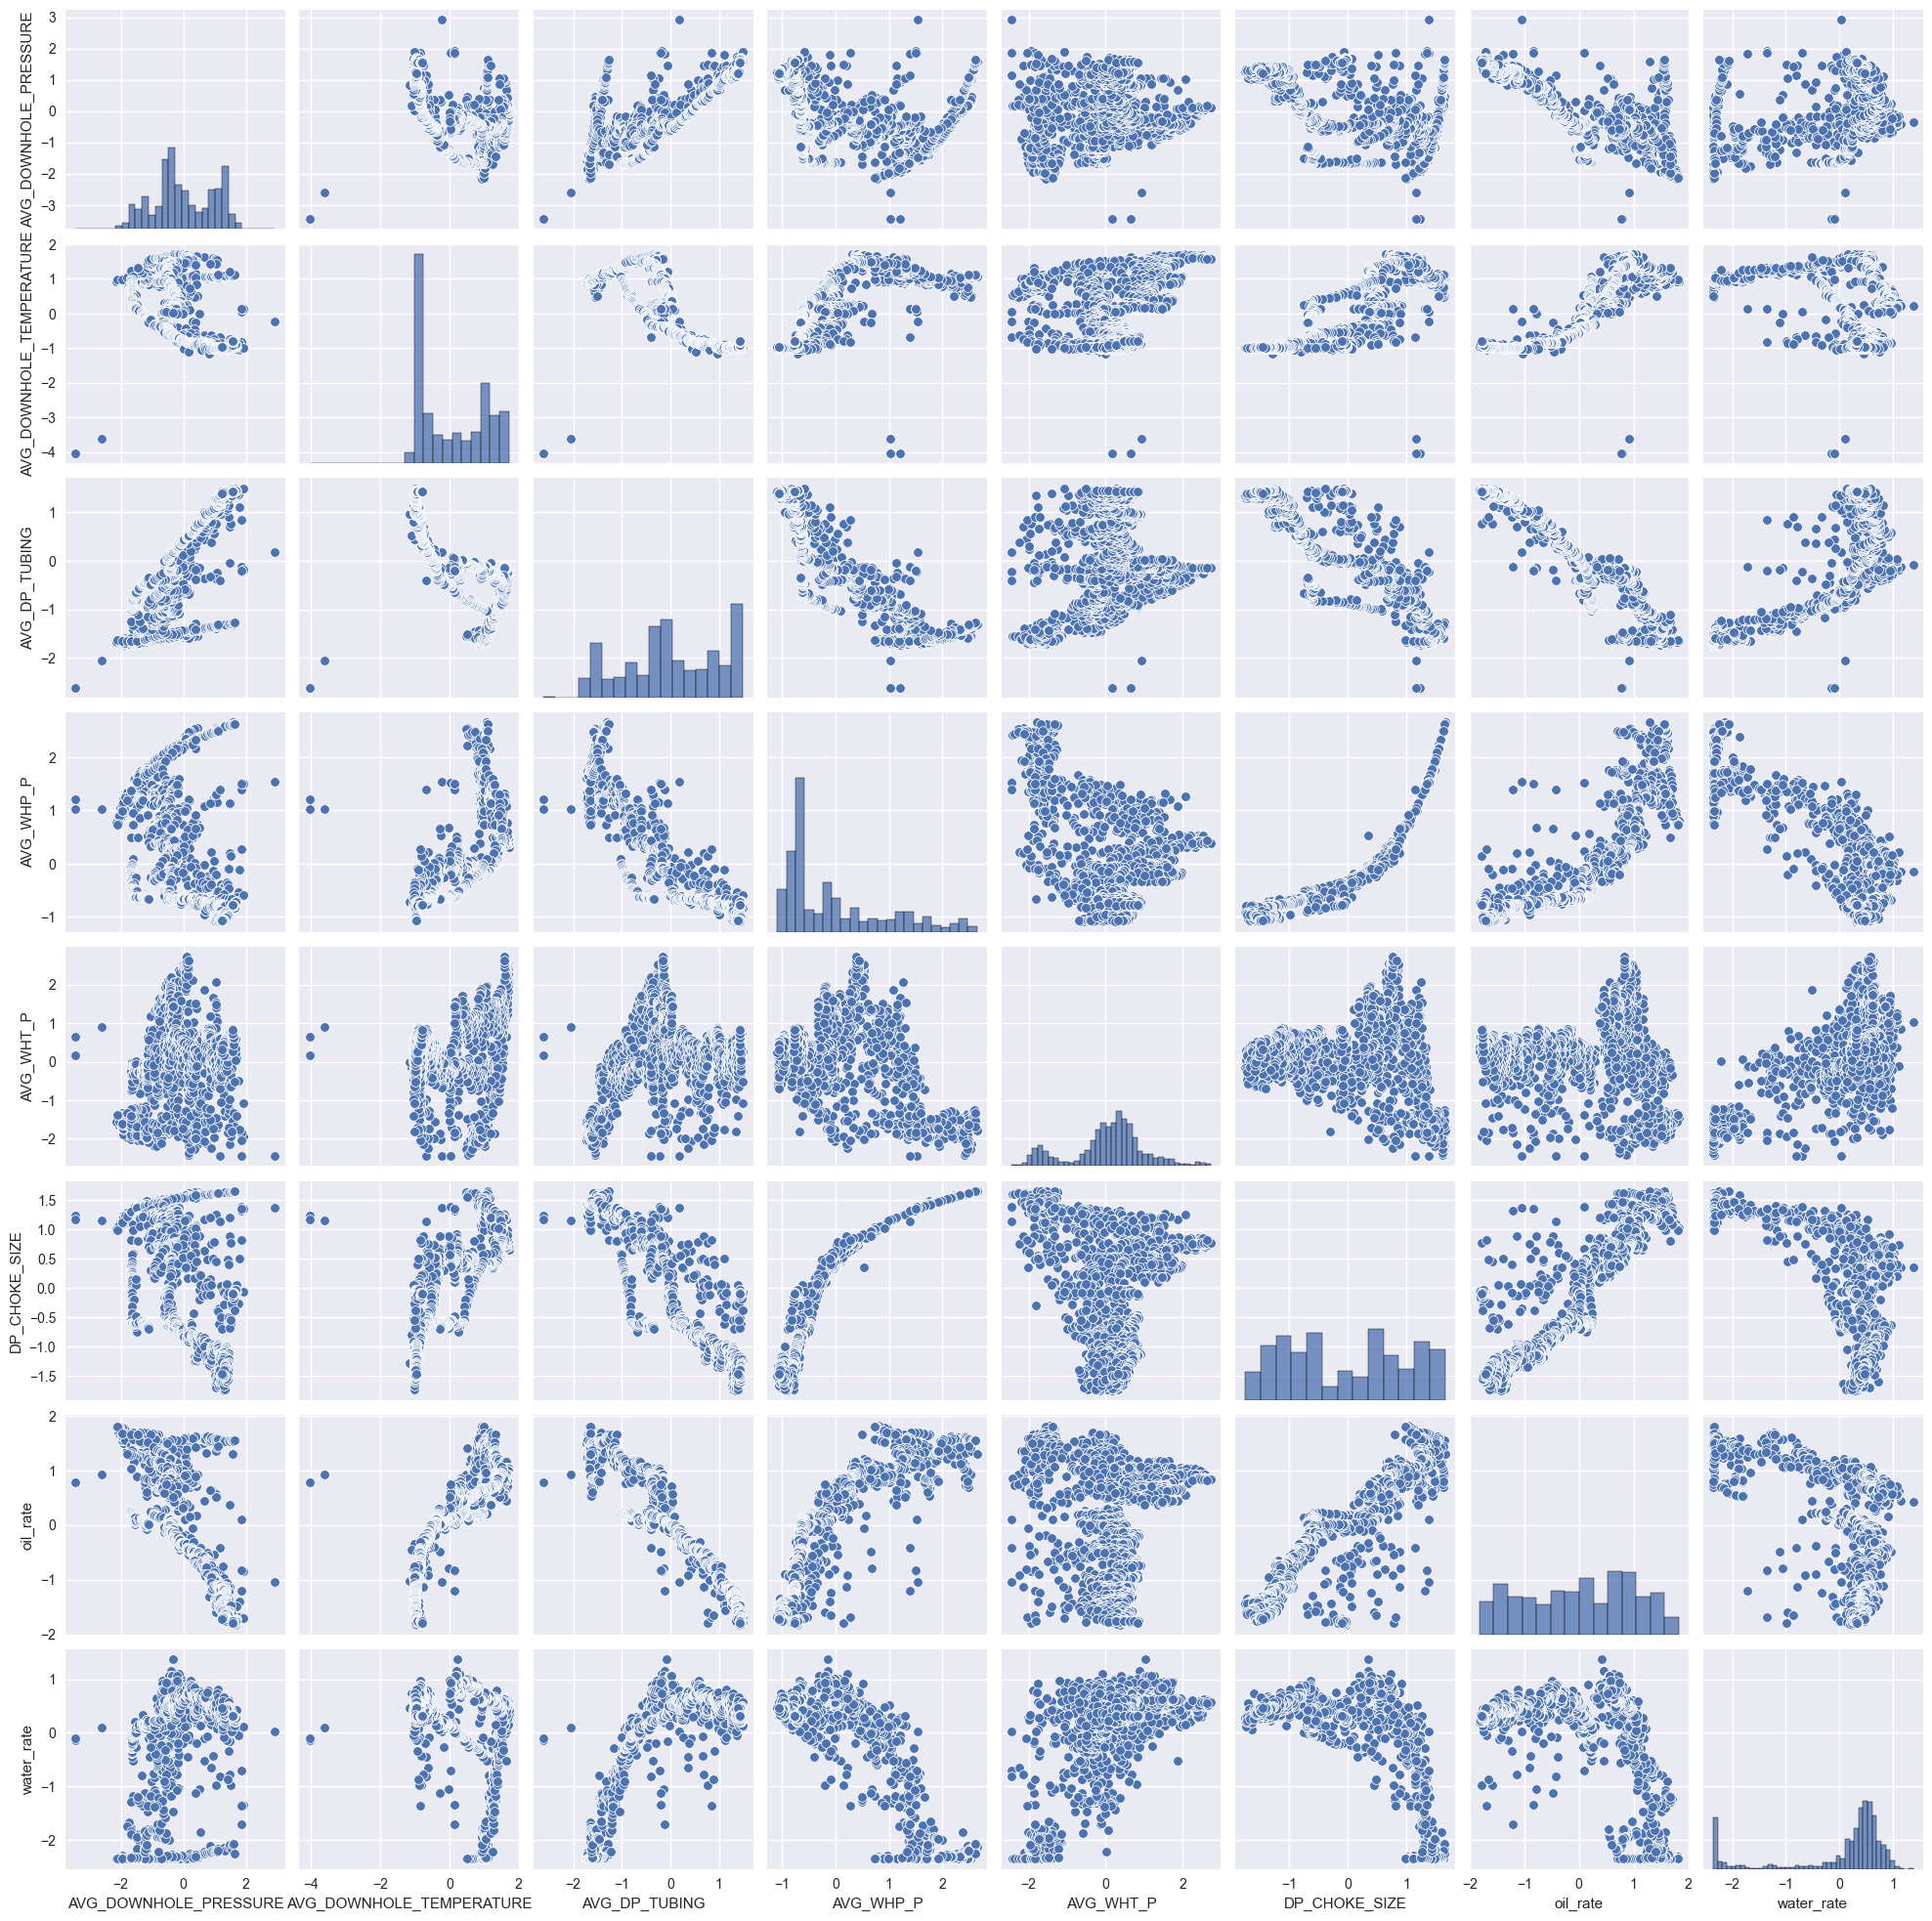

In [39]:
# outliers_removed_lof
# have a look at all the scatter plots between all variables
sns.pairplot(outliers_removed_lof);

Prediction with ML

In [40]:
# df_well_c1_t
# index
# outliers_removed_lof

# Merge the DataFrames based on their indexes
merged_df = outliers_removed_lof.merge(index, left_index=True, right_index=True)
# merged_df

# # Print the merged DataFrame
merged_df.set_index('DATEPRD', inplace=True)
# merged_df

# # final datasets
# # i know it's still messed up ye but we'll take it
# df_well_c1_for_ml = df_well_c1_well_date.merge(merged_df, left_index=True, right_index=True)
df_well_c1_for_ml = merged_df
df_well_c1_for_ml

AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
DATEPRD                                                                      
2008-07-14               0.455324                  0.509061      -1.549722   
2008-07-15               0.361219                  0.488981      -1.556727   
2008-07-16               0.109566                  0.586131      -1.568056   
2008-07-17              -0.036868                  0.638171      -1.569287   
2008-07-18               0.111359                  0.635936      -1.579799   
...                           ...                       ...            ...   
2016-06-30               1.582239                 -0.803861       1.435722   
2016-07-01               1.588270                 -0.801500       1.436689   
2016-07-02               1.579252                 -0.797492       1.434394   
2016-07-03               1.578779                 -0.794801       1.432211   
2016-07-06               1.561530                 -0.785604       1.430536   

            AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  oil_rate  water_rate  
DATEPRD                                                                
2008-07-14   2.554937  -2.147893       1.642905  0.934669   -2.348112  
2008-07-15   2.524883  -2.273471       1.635167  0.926048   -2.348189  
2008-07-16   2.428485  -2.004790       1.610378  1.123909   -2.344211  
2008-07-17   2.360179  -1.648966       1.591867  1.215305   -2.346079  
2008-07-18   2.446853  -1.863104       1.615337  1.028237   -2.341882  
...               ...        ...            ...       ...         ...  
2016-06-30  -0.766402   0.616297      -0.080480 -1.766387    0.314686  
2016-07-01  -0.762504   0.613451      -0.094020 -1.758221    0.311227  
2016-07-02  -0.767001   0.739252      -0.082155 -1.765751    0.318266  
2016-07-03  -0.763991   0.726544      -0.073641 -1.760857    0.309990  
2016-07-06  -0.776914   0.833078      -0.101546 -1.784924    0.319817  

[2426 rows x 8 columns]

spill input-output

In [41]:
# change from dates into days

df = df_well_c1_for_ml
# df
# df["days"] = (df["DATEPRD"] - df["DATEPRD"].min()).dt.days

In [42]:
X = df[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING'
     ,'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE']]
y_oil = df[['oil_rate']]
y_water = df[['water_rate']]

In [68]:
y_water

water_rate
DATEPRD               
2008-07-14   -2.348112
2008-07-15   -2.348189
2008-07-16   -2.344211
2008-07-17   -2.346079
2008-07-18   -2.341882
...                ...
2016-06-30    0.314686
2016-07-01    0.311227
2016-07-02    0.318266
2016-07-03    0.309990
2016-07-06    0.319817

[2426 rows x 1 columns]

spill train and test data

 for oil

In [90]:
# using sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_oil_train, y_oil_test = train_test_split(X, y_oil,
                                                    test_size = 0.3,
                                                    shuffle = False,
                                                    random_state = 123)

In [91]:
print(X_train.shape, X_test.shape)

(1698, 6) (728, 6)


for water

In [92]:
# using sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_wat_train, y_wat_test = train_test_split(X, y_water,
                                                            test_size = 0.3,
                                                            shuffle = False,
                                                            random_state = 123)

In [93]:
print(X_train.shape, X_test.shape)

(1698, 6) (728, 6)


use autoML TPOTRegressor

In [96]:

from tpot import TPOTRegressor

# lets set 20 minutes as a max times to modeling this dataset

model_tpot_oil = TPOTRegressor(
                                max_time_mins=60,
                                verbosity=2,
                                scoring="neg_mean_absolute_error",
                                # config_dict='TPOT cuML',
                                random_state=123)
# neg_mean_absolute_error

In [97]:
# # fit test into train dataset for oil
model_tpot_oil.fit(X_train, y_oil_train)

                                                                              
Best pipeline: ExtraTreesRegressor(AdaBoostRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.4, min_samples_leaf=6, min_samples_split=2, n_estimators=100), learning_rate=0.001, loss=square, n_estimators=100), bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=5, min_samples_split=6, n_estimators=100)


TPOTRegressor(max_time_mins=60, random_state=123,
              scoring='neg_mean_absolute_error', verbosity=2)

In [50]:
model_tpot_oil.export('ml_tpot_oil_pipeline.py')

In [98]:
# see the test score for oil
# hmm, not good enough
print(f' Train Score: {model_tpot_oil.score(X_train, y_oil_train)}')
print(f' Test Score: {model_tpot_oil.score(X_test, y_oil_test)}')

 Train Score: -0.030021419997394626
 Test Score: -0.35162753371984223


In [99]:
# using sklearn
from sklearn.metrics import mean_absolute_error


y_oil_pred = model_tpot_oil.predict(X_test)
mean_absolute_error(y_oil_test, y_oil_pred)

# for checking baseline model
# y_oil_train
# y_oil_test
# model_tpot_oil.predict(X_train)
# model_tpot_oil.predict(X_test)

0.35162753371984223

In [100]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# for oil
# R-squared
r2_train = r2_score(y_oil_train, model_tpot_oil.predict(X_train))
r2_test = r2_score(y_oil_test, model_tpot_oil.predict(X_test))

# Mean Squared Error
mse_train = mean_squared_error(y_oil_train, model_tpot_oil.predict(X_train))
mse_test = mean_squared_error(y_oil_test, model_tpot_oil.predict(X_test))

# Mean Absolute Error
mae_train = mean_absolute_error(y_oil_train, model_tpot_oil.predict(X_train))
mae_test = mean_absolute_error(y_oil_test, model_tpot_oil.predict(X_test))

# Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

y_pred_baseline_oil = y_oil_train.mean()[0]

r2_train_baseline_oil = r2_score(y_oil_train, y_pred_baseline_oil * np.ones(len(y_oil_train)))
r2_test_baseline_oil = r2_score(y_oil_test, y_pred_baseline_oil * np.ones(len(y_oil_test)))

mse_train_baseline_oil = mean_squared_error(y_oil_train, y_pred_baseline_oil * np.ones(len(y_oil_train)))
mse_test_baseline_oil = mean_squared_error(y_oil_test, y_pred_baseline_oil * np.ones(len(y_oil_test)))

mae_train_baseline_oil = mean_absolute_error(y_oil_train, y_pred_baseline_oil * np.ones(len(y_oil_train)))
mae_test_baseline_oil = mean_absolute_error(y_oil_test, y_pred_baseline_oil * np.ones(len(y_oil_test)))

print('For Oil\n')
print(f'Train R-squared: {r2_train}, Test R-squared: {r2_test}')
print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')
print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}\n')

print(f'R2 Train Baseline Oil: {r2_train_baseline_oil}, R2 Test Baseline Oil: {r2_test_baseline_oil}')
print(f'MSE Train Baseline Oil: {mse_train_baseline_oil}, MSE Test Baseline Oil: {mse_test_baseline_oil}')
print(f'MAE Train Baseline Oil: {mae_train_baseline_oil}, MAE Test Baseline Oil: {mae_test_baseline_oil}\n\n')

For Oil

Train R-squared: 0.9917986561060701, Test R-squared: -0.5169302139669185
Train MSE: 0.0034748395558626918, Test MSE: 0.16123572811214432
Train MAE: 0.030021419997394626, Test MAE: 0.35162753371984223
Train RMSE: 0.05894776972763848, Test RMSE: 0.4015416891334502

R2 Train Baseline Oil: 0.0, R2 Test Baseline Oil: -29.65142210793995
MSE Train Baseline Oil: 0.42369148285984615, MSE Test Baseline Oil: 3.257964219937512
MAE Train Baseline Oil: 0.5475417264299381, MAE Test Baseline Oil: 1.7752953046004418




In [101]:
y_oil_test_prediction = y_oil_test
y_oil_test_prediction["oil_prediction"] = y_oil_pred
y_oil_test_prediction

oil_rate  oil_prediction
DATEPRD                             
2014-04-19 -0.508839       -0.563212
2014-04-20 -0.515095       -0.571200
2014-04-21 -0.514037       -0.527205
2014-04-23 -0.505216       -0.552860
2014-04-25 -0.492655       -0.557107
...              ...             ...
2016-06-30 -1.766387       -1.060076
2016-07-01 -1.758221       -1.060076
2016-07-02 -1.765751       -1.058851
2016-07-03 -1.760857       -1.052234
2016-07-06 -1.784924       -1.039876

[728 rows x 2 columns]

In [102]:
# we want to see the distribution of the data using graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="OIL TRAIN GRAPH",
        x=y_oil_train.index,
        y=y_oil_train["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': 'red'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="OIL TEST GRAPH",
        x=y_oil_test_prediction.index,
        y=y_oil_test_prediction["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="OIL PREDICTION GRAPH",
        x=y_oil_test_prediction.index,
        y=y_oil_test_prediction["oil_prediction"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='OIL TEST VS OIL PREDICTION',
    xaxis_title='Date'
)


figure.show()

In [105]:
# use another model for water

from tpot import TPOTRegressor

# lets set 15 minutes as a max times to modeling this dataset

model_tpot_wat = TPOTRegressor(
                                max_time_mins=60,
                                verbosity=2,
                                scoring="neg_mean_absolute_error",
                                random_state=123
                            )



In [103]:
# make another model for water, based on R2
from tpot import TPOTRegressor
# from sklearn.metrics import make_scorer

# lets set 30 minutes as a max times to modeling this dataset
# and now let's set the score so we can define if this is not about overfitting

# # Make a custom metric function
# def my_custom_accuracy(y_true, y_pred):
#     return float(sum(y_pred == y_true)) / len(y_true)

# # Make a custom a scorer from the custom metric function
# # Note: greater_is_better=False in make_scorer below would mean that the scoring function should be minimized.
# my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

model_tpot_wat_r2 = TPOTRegressor(
                                max_time_mins=30,
                                verbosity=2,
                                scoring="r2",
                                random_state=123
                            )

In [104]:
X_train

AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
DATEPRD                                                                      
2008-07-14               0.455324                  0.509061      -1.549722   
2008-07-15               0.361219                  0.488981      -1.556727   
2008-07-16               0.109566                  0.586131      -1.568056   
2008-07-17              -0.036868                  0.638171      -1.569287   
2008-07-18               0.111359                  0.635936      -1.579799   
...                           ...                       ...            ...   
2014-04-14               0.457805                 -0.860956       0.695141   
2014-04-15               0.468512                 -0.860915       0.701759   
2014-04-16               0.426744                 -0.936780       0.680199   
2014-04-17               0.487535                 -0.858286       0.714542   
2014-04-18               0.492803                 -0.857577       0.717443   

            AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  
DATEPRD                                          
2008-07-14   2.554937  -2.147893       1.642905  
2008-07-15   2.524883  -2.273471       1.635167  
2008-07-16   2.428485  -2.004790       1.610378  
2008-07-17   2.360179  -1.648966       1.591867  
2008-07-18   2.446853  -1.863104       1.615337  
...               ...        ...            ...  
2014-04-14  -0.640771   0.383238      -0.807980  
2014-04-15  -0.640899   0.421744      -0.795022  
2014-04-16  -0.647798  -0.065162      -0.837396  
2014-04-17  -0.642907   0.162288      -0.814670  
2014-04-18  -0.642375   0.482526      -0.808498  

[1698 rows x 6 columns]

In [106]:
y_wat_train

water_rate
DATEPRD               
2008-07-14   -2.348112
2008-07-15   -2.348189
2008-07-16   -2.344211
2008-07-17   -2.346079
2008-07-18   -2.341882
...                ...
2014-04-14    0.649992
2014-04-15    0.667171
2014-04-16    0.667749
2014-04-17    0.665219
2014-04-18    0.667955

[1698 rows x 1 columns]

In [107]:
# fit test into train dataset for oil
model_tpot_wat.fit(X_train, y_wat_train)

                                                                              
Generation 1 - Current best internal CV score: -0.33928334105400487
                                                                              
Generation 2 - Current best internal CV score: -0.3034848141165337
                                                                              
Generation 3 - Current best internal CV score: -0.3027480221834904
                                                                              
Generation 4 - Current best internal CV score: -0.28262876174835216
                                                                              
Generation 5 - Current best internal CV score: -0.27884249053317217
                                                                              
Generation 6 - Current best internal CV score: -0.26412980688783677
                                                                              
Generation 7 - Current best internal CV s

TPOTRegressor(max_time_mins=60, random_state=123,
              scoring='neg_mean_absolute_error', verbosity=2)

In [110]:
# see the test score for oil
# hmm, not good enough
print(f' Train Score: {model_tpot_wat.score(X_train, y_wat_train)}')
print(f' Test Score: {model_tpot_wat.score(X_test, y_wat_test)}')

 Train Score: -0.1406606164367416
 Test Score: -0.11655467010657283


In [113]:
# using sklearn
from sklearn.metrics import r2_score

y_wat_pred = model_tpot_wat.predict(X_test)
mean_absolute_error(y_wat_test, y_wat_pred)

0.11655467010657283

In [114]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# for wat
# R-squared
r2_train2 = r2_score(y_wat_train, model_tpot_wat.predict(X_train))
r2_test2 = r2_score(y_wat_test, model_tpot_wat.predict(X_test))

# Mean Squared Error
mse_train2 = mean_squared_error(y_wat_train, model_tpot_wat.predict(X_train))
mse_test2 = mean_squared_error(y_wat_test, model_tpot_wat.predict(X_test))

# Mean Absolute Error
mae_train2 = mean_absolute_error(y_wat_train, model_tpot_wat.predict(X_train))
mae_test2 = mean_absolute_error(y_wat_test, model_tpot_wat.predict(X_test))

# Root Mean Squared Error
rmse_train2 = np.sqrt(mse_train2)
rmse_test2 = np.sqrt(mse_test2)

y_pred_baseline_wat = y_oil_train.mean()[0]

r2_train_baseline_wat = r2_score(y_wat_train, y_pred_baseline_wat * np.ones(len(y_wat_train)))
r2_test_baseline_wat = r2_score(y_wat_test, y_pred_baseline_wat * np.ones(len(y_wat_test)))

mse_train_baseline_wat = mean_squared_error(y_wat_train, y_pred_baseline_wat * np.ones(len(y_wat_train)))
mse_test_baseline_wat = mean_squared_error(y_wat_test, y_pred_baseline_wat * np.ones(len(y_wat_test)))

mae_train_baseline_wat = mean_absolute_error(y_wat_train, y_pred_baseline_wat * np.ones(len(y_wat_train)))
mae_test_baseline_wat = mean_absolute_error(y_wat_test, y_pred_baseline_wat * np.ones(len(y_wat_test)))

print('For Water\n')
print(f'Train R-squared: {r2_train2}, Test R-squared: {r2_test2}')
print(f'Train MSE: {mse_train2}, Test MSE: {mse_test2}')
print(f'Train MAE: {mae_train2}, Test MAE: {mae_test2}')
print(f'Train RMSE: {rmse_train2}, Test RMSE: {rmse_test2}\n')

print(f'R2 Train Baseline Oil: {r2_train_baseline_wat}, R2 Test Baseline Oil: {r2_test_baseline_wat}')
print(f'MSE Train Baseline Oil: {mse_train_baseline_wat}, MSE Test Baseline Oil: {mse_test_baseline_wat}')
print(f'MAE Train Baseline Oil: {mae_train_baseline_wat}, MAE Test Baseline Oil: {mae_test_baseline_wat}\n\n')

For Water

Train R-squared: 0.9669795963896705, Test R-squared: -0.16598954404541133
Train MSE: 0.04180875467342511, Test MSE: 0.02150293023690876
Train MAE: 0.1406606164367416, Test MAE: 0.11655467010657283
Train RMSE: 0.20447189213538644, Test RMSE: 0.14663877467064693

R2 Train Baseline Oil: -0.39221251450197525, R2 Test Baseline Oil: -0.5138155750270017
MSE Train Baseline Oil: 1.7627486374478174, MSE Test Baseline Oil: 0.02791746364072349
MAE Train Baseline Oil: 0.8461047525322831, MAE Test Baseline Oil: 0.13335075778416725




In [115]:
y_wat_test_prediction = y_wat_test
y_wat_test_prediction["wat_prediction"] = y_wat_pred
y_wat_test_prediction

water_rate  wat_prediction
DATEPRD                               
2014-04-19    0.673194        0.625788
2014-04-20    0.671740        0.629967
2014-04-21    0.532543        0.611835
2014-04-23    0.547845        0.637163
2014-04-25    0.745620        0.604351
...                ...             ...
2016-06-30    0.314686        0.259401
2016-07-01    0.311227        0.260357
2016-07-02    0.318266        0.266499
2016-07-03    0.309990        0.269500
2016-07-06    0.319817        0.278406

[728 rows x 2 columns]

In [117]:
# we want to see the distribution of the data using graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="OIL TRAIN GRAPH",
        x=y_wat_train.index,
        y=y_wat_train["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': 'red'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="OIL TEST GRAPH",
        x=y_wat_test_prediction.index,
        y=y_wat_test_prediction["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="OIL PREDICTION GRAPH",
        x=y_wat_test_prediction.index,
        y=y_wat_test_prediction["wat_prediction"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='OIL TEST VS OIL PREDICTION',
    xaxis_title='Date'
)


figure.show()

In [108]:
model_tpot_wat.export('ml_tpot_water_pipeline.py')